In [176]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [177]:
df = pd.read_csv("/home/neo/Downloads/Store.csv")

In [178]:
df.shape

(9994, 13)

In [179]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [180]:
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [181]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [182]:
# we have only 1 country so we can drop it
# postal code is highly corelated to the state hence we will drop that as well
df['Country'].nunique()

1

# removing highly correlated column

In [183]:
# postal code is highly corelated to the state hence we will drop that as well
df = df.drop(['Country'], axis = 1) 
df = df.drop(['Postal Code'], axis = 1) 

In [184]:
col = df.columns
col

Index(['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category',
       'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [185]:
# to check the corelation and do the explaratory analysis we have to convert the catagorical data to numerical.
# we can use label encoder 

#le = LabelEncoder()

# but the issue is we will not able to interpretate afterwords which value become which number.

# i'll manually replace all the column except Sate and Sub-catagory because of their huge unique elements.

In [186]:
# before transformation we can use the uniqe number of elenent by
# postal code is highly corelated to the state hence we will drop that as well

# checking unique values and their count

In [187]:
# checking the number and name of the unique elements
print(df['Ship Mode'].nunique(),set(df['Ship Mode']))
print(df['Segment'].nunique(),set(df['Segment']))
print(df['State'].nunique(),set(df['State']))
print(df['Region'].nunique(),set(df['Region']))
print(df['Category'].nunique(),set(df['Category']))
print(df['Sub-Category'].nunique(),set(df['Sub-Category']))

4 {'Second Class', 'Same Day', 'Standard Class', 'First Class'}
3 {'Home Office', 'Consumer', 'Corporate'}
49 {'New York', 'Arizona', 'Ohio', 'Maine', 'Minnesota', 'Utah', 'District of Columbia', 'Wyoming', 'Arkansas', 'Connecticut', 'North Carolina', 'Mississippi', 'Maryland', 'Virginia', 'Idaho', 'Kentucky', 'Montana', 'Vermont', 'Michigan', 'New Jersey', 'Rhode Island', 'New Mexico', 'Kansas', 'Florida', 'Georgia', 'Tennessee', 'Indiana', 'Illinois', 'Oregon', 'Iowa', 'Wisconsin', 'Nevada', 'South Carolina', 'Colorado', 'Nebraska', 'California', 'Missouri', 'Oklahoma', 'Texas', 'Washington', 'Louisiana', 'Alabama', 'New Hampshire', 'North Dakota', 'West Virginia', 'Massachusetts', 'Pennsylvania', 'South Dakota', 'Delaware'}
4 {'South', 'West', 'East', 'Central'}
3 {'Technology', 'Office Supplies', 'Furniture'}
17 {'Paper', 'Storage', 'Art', 'Bookcases', 'Chairs', 'Fasteners', 'Binders', 'Copiers', 'Furnishings', 'Appliances', 'Phones', 'Machines', 'Labels', 'Accessories', 'Supplies'

# Converting them to numerical values

In [189]:
# Now we know which value is replaced by which number on Ship Mode column hence we can easily interpretate the 
# final explaratory analysys this is not possible in label encoder
df = df.replace('First Class', 0)
df = df.replace('Second Class', 1)
df = df.replace('Same Day', 2)
df = df.replace('Standard Class', 3)

In [192]:
# continue to do the same with other columns
df = df.replace('Corporate', 0)
df = df.replace('Consumer', 1)
df = df.replace('Home Office', 2)

In [193]:
df = df.replace('South', 0)
df = df.replace('West', 1)
df = df.replace('East', 2)
df = df.replace('Central', 3)



In [194]:
df = df.replace('Technology', 0)
df = df.replace('Furniture', 1)
df = df.replace('Office Supplies', 2)

In [196]:
# using label encoder to encode City,State and subcatagory
le = LabelEncoder()


In [199]:
df['City'] = le.fit_transform(df['City'])
df['State'] = le.fit_transform(df['State'])
df['Sub-Category'] = le.fit_transform(df['Sub-Category'])

In [200]:
# Now we have a dataset with complete numerical values now we can perform exploratory analysis on it
df.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,1,1,194,15,0,1,4,261.9600,2,0.00,41.9136
1,1,1,194,15,0,1,5,731.9400,3,0.00,219.5820
2,1,0,266,3,1,2,10,14.6200,2,0.00,6.8714
3,3,1,153,8,0,1,16,957.5775,5,0.45,-383.0310
4,3,1,153,8,0,2,14,22.3680,2,0.20,2.5164


# Explaratory analysis

In [204]:
# all are in integer values
df.dtypes

Ship Mode         int64
Segment           int64
City              int64
State             int64
Region            int64
Category          int64
Sub-Category      int64
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [205]:
# missing values and other information
df.describe()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,2.094757,0.519412,279.957274,22.343206,1.587753,1.418151,7.590454,229.858001,3.789574,0.156203,28.656896
std,1.182584,0.499648,139.157896,15.504611,1.015616,0.782933,5.051429,623.245101,2.225110,0.206452,234.260108
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.444000,1.000000,0.000000,-6599.978000
25%,1.000000,0.000000,164.000000,4.000000,1.000000,1.000000,3.000000,17.280000,2.000000,0.000000,1.728750
50%,3.000000,1.000000,295.000000,27.000000,2.000000,2.000000,9.000000,54.490000,3.000000,0.200000,8.666500
75%,3.000000,1.000000,394.000000,36.000000,2.000000,2.000000,12.000000,209.940000,5.000000,0.200000,29.364000
max,3.000000,1.000000,530.000000,48.000000,3.000000,2.000000,16.000000,22638.480000,14.000000,0.800000,8399.976000


In [220]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

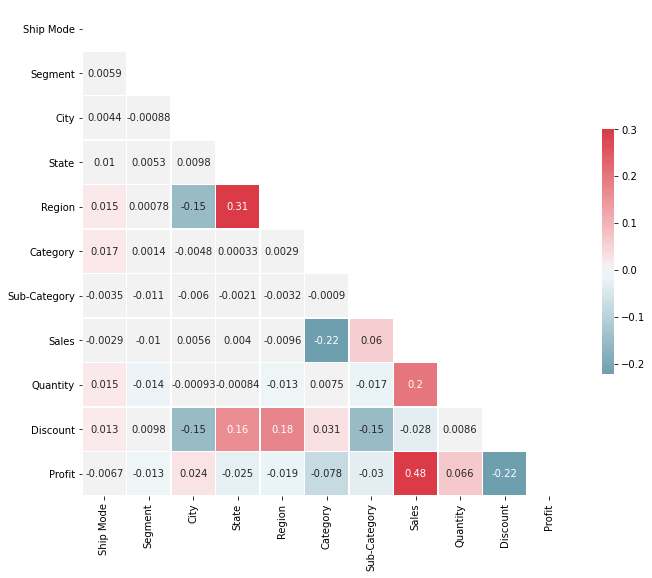

In [224]:
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, annot = True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
# here we can see the corelation of profit with all values
# profit have high corelation with sales, catagory, quantity

Text(0, 0.5, 'Profit')

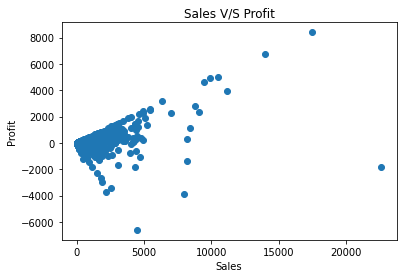

In [251]:
# bivariant analysis 
# Here we can see as sales increased profit also increased but not always
plt.scatter(df['Sales'],df['Profit'])
plt.title('Sales V/S Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')

Text(0, 0.5, 'Category')

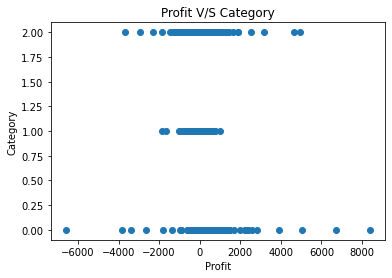

In [249]:
# catagory wise scatter plot of profit
# we can see catagory 0 & 2 are more profitable then catagory 1 as most of the part is left side of the no profit.
plt.scatter(df['Profit'],df['Category'])
plt.title('Profit V/S Category')
plt.xlabel('Profit')
plt.ylabel('Category')

Text(0, 0.5, 'Profit')

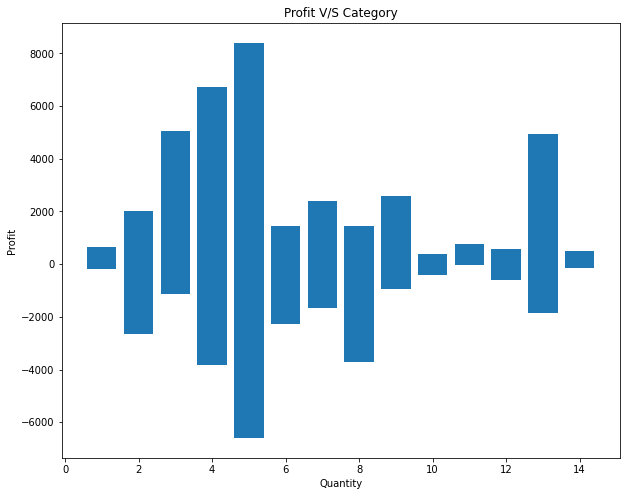

In [256]:
# here we can see if the purchse made in 2,4,5,6,8 quantity they are not making any good profit as they have almost
# same profit and loss
# if the quantity is 2,3,9,11 they made more profit

plt.rcParams["figure.figsize"] = (10, 8)
plt.bar(df['Quantity'],df['Profit'])
plt.title('Profit V/S Category')
plt.xlabel('Quantity')
plt.ylabel('Profit')

Text(0, 0.5, 'Profit')

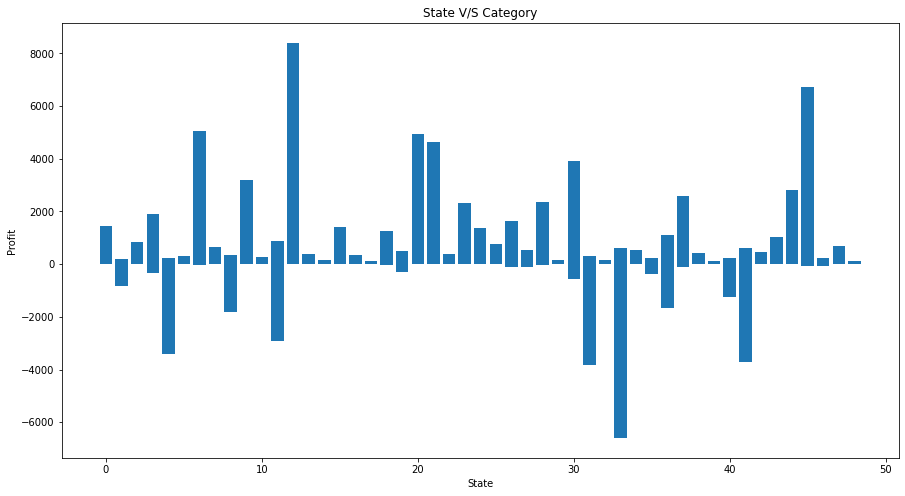

In [255]:
# in the plot we can clearly see the Profit city wise.
# city 2,5,9,11,31,33 and 41 are majour contributor for less profit.
# We can decrease/stop selling selling in those city

plt.rcParams["figure.figsize"] = (15, 8)
plt.bar(df['State'],df['Profit'])
plt.title('State V/S Category')
plt.xlabel('State')
plt.ylabel('Profit')

Text(0, 0.5, 'Profit')

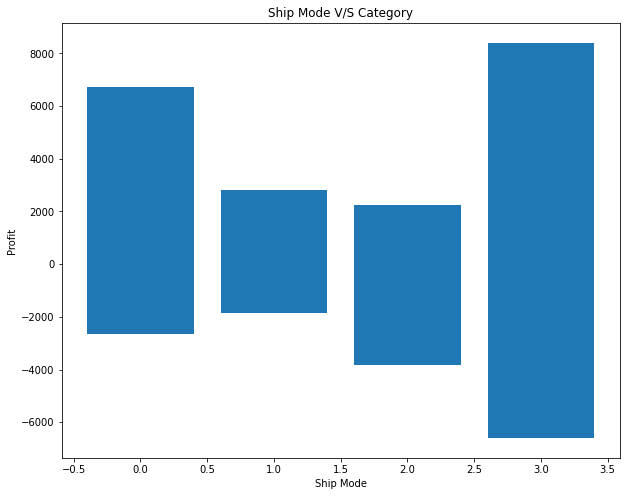

In [258]:
# shipping mode 2,3 is not profitable.
plt.rcParams["figure.figsize"] = (10, 8)
plt.bar(df['Ship Mode'],df['Profit'])
plt.title('Ship Mode V/S Category')
plt.xlabel('Ship Mode')
plt.ylabel('Profit')

Text(0, 0.5, 'Profit')

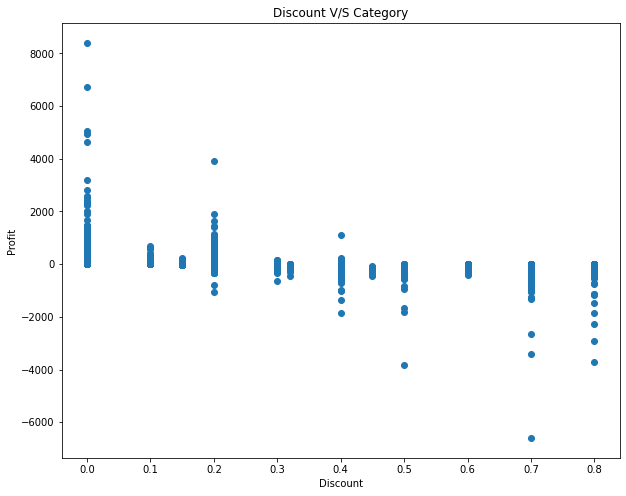

In [264]:
# dicsount .3 and above reducing the profit
plt.rcParams["figure.figsize"] = (10, 8)
plt.scatter(df['Discount'],df['Profit'])
plt.title('Discount V/S Category')
plt.xlabel('Discount')
plt.ylabel('Profit')